# Import Libraries

In [1]:
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [2]:
tf.__version__

'2.6.2'

# TensorFlow - Neural Network Regression

## Architecture of Regression Model

|Hyperparameter              |Typical Value                                                                                            |
|----------------------------|---------------------------------------------------------------------------------------------------------|
|Input Layer Shape           |Same shape as number of features (eg. 3 for #bedrooms, #bathrooms, # car space in house price prediction)|
|Hidden Layer(s)             |Problem specific, minimum = 1 & maximum = unlimited                                                      |
|Neurons per hidden layer    |Problem specific, generally 10 - 100                                                                     |
|Output Layer Shape          |Same shape as desired prediction shape (e.g. 1 for house price)                                          |
|Hidden Activation           |Usually ReLU, tanh                                                                                       |
|Output Activation           |None, ReLU, tanh/softmax                                                                                       |
|Loss function               |MSE (Mean Square Error) or MAE(Mean Absolute Error)/Huber (combination of MAE/MSE) if outliers           |
|Optimizer                   |SGD(Stochastic Gradient Descent), Adam                                                                   |

## Sample Regression Problem

### Sample data

In [3]:
X = np.arange(-7, 15, 3, dtype=np.float32)
y = X + 10

In [4]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

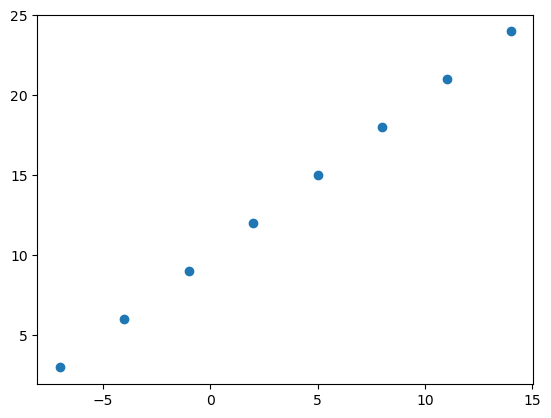

In [5]:
plt.scatter(X, y)

### Sample Model

#### NumPy to Tensors

In [6]:
X = tf.expand_dims(tf.constant(X), axis=-1)
y = tf.constant(y)

2023-06-24 17:54:08.414425: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-24 17:54:08.414523: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-24 17:54:08.414602: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (582544b20265): /proc/driver/nvidia/version does not exist
2023-06-24 17:54:08.415182: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Create Model

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=(1, 1))
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 1)              2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### Compile Model

In [9]:
model.compile(
    loss=keras.losses.mae,
    optimizer=keras.optimizers.SGD(),
    metrics=['mae']
)

#### Fit the model

In [10]:
history = model.fit(X, y, epochs=5)

Epoch 1/5


2023-06-24 17:54:08.737313: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1/1 [==============================] - 0s 479ms/step - loss: 12.5421 - mae: 12.5421
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 12.4096 - mae: 12.4096
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 12.2772 - mae: 12.2772
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 12.1446 - mae: 12.1446
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 12.0121 - mae: 12.0121


In [11]:
model.predict(tf.expand_dims(tf.constant([10]), axis=-1))

array([[[4.536715]]], dtype=float32)

### Tune model

#### Adding Layers

In [12]:
X.shape, y.shape

(TensorShape([8, 1]), TensorShape([8]))

In [13]:
tf.random.set_seed(42)

# Create Model
model = keras.models.Sequential([
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(1)
])

# Compile
model.compile(
    loss=keras.losses.mae,
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Fit
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 511ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.3098 - mae: 12.3098
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3011 - mae: 12.3011
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.2924 - mae: 12.2924
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2837 - mae: 12.2837
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2750 - mae: 12.2750
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 12.2662 - mae: 12.2662
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2575 - mae: 12.2575
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2488 - mae: 12.2488
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 12.2401 - mae: 12.2401
Epoch 11/100
1/1 [==============================] - 0s 6m

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.predict(tf.expand_dims(tf.constant([17]), axis=-1))

array([[5.8252435]], dtype=float32)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 594ms/step - loss: 13.3925 - mae: 13.3925
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.0753 - mae: 13.0753
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7635 - mae: 12.7635
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4587 - mae: 12.4587
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1600 - mae: 12.1600
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8656 - mae: 11.8656
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5691 - mae: 11.5691
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2710 - mae: 11.2710
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9729 - mae: 10.9729
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6777 - mae: 10.6777
Epoch 11/100
1/1 [==============================] - 0s

In [17]:
# Try and predict what y would be if X was 17.0
model.predict(tf.expand_dims([17.0], axis=-1)) # the right answer is 27.0 (y = X + 10)

array([[[31.60745]]], dtype=float32)

### Increase Data Size

In [18]:
X = tf.range(-100, 100, 4)

In [19]:
y = X + 10

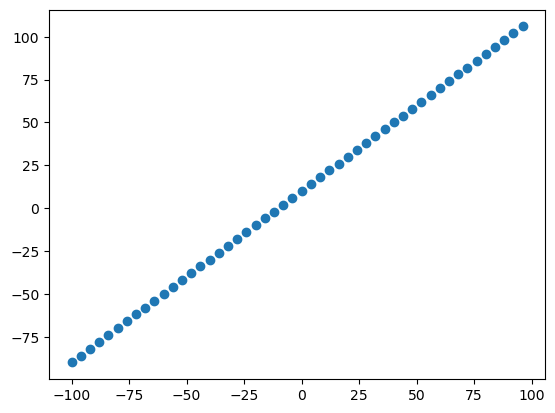

In [20]:
plt.scatter(X, y)

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), train_size=0.8, test_size=0.2)

In [22]:
# X_train = tf.constant(X_train, dtype=tf.dtypes.float64)
# X_test = tf.constant(X_test, dtype=tf.dtypes.float64)
# y_train = tf.constant(y_train, dtype=tf.dtypes.float64)
# y_test = tf.constant(y_test, dtype=tf.dtypes.float64) 

In [23]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

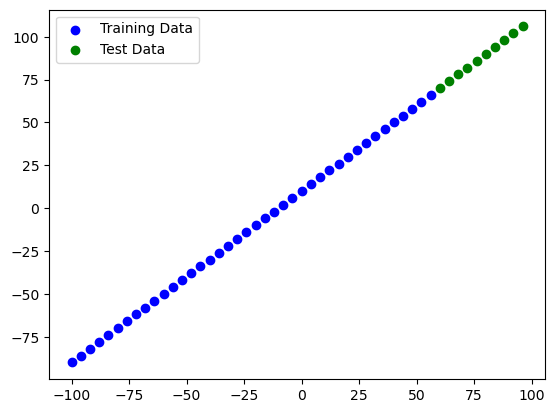

In [24]:
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Test Data')
plt.legend()

#### Modeling

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, input_shape=[1]), # define the input_shape to our model
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [26]:
model.fit(X_train, y_train, epochs=100, verbose=1) 

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 36.6111 - mae: 36.6111
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 29.0552 - mae: 29.0552
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 34.1373 - mae: 34.1373
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 27.5429 - mae: 27.5429
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 15.0199 - mae: 15.0199
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9461 - mae: 11.9461
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2722 - mae: 11.2722
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1393 - mae: 11.1393
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.9448 - mae: 40.9448
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.2775 - mae: 28.2775
Epoch 11/100
2/2 [==============================] - 0s 3m

In [27]:
y_preds = model.predict(X_test)
y_preds, X_test

(array([[ 78.254326],
        [ 83.35619 ],
        [ 88.458046],
        [ 93.55991 ],
        [ 98.66178 ],
        [103.76363 ],
        [108.8655  ],
        [113.96737 ],
        [119.06923 ],
        [124.17109 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>)

### Evaluating Model

In [28]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

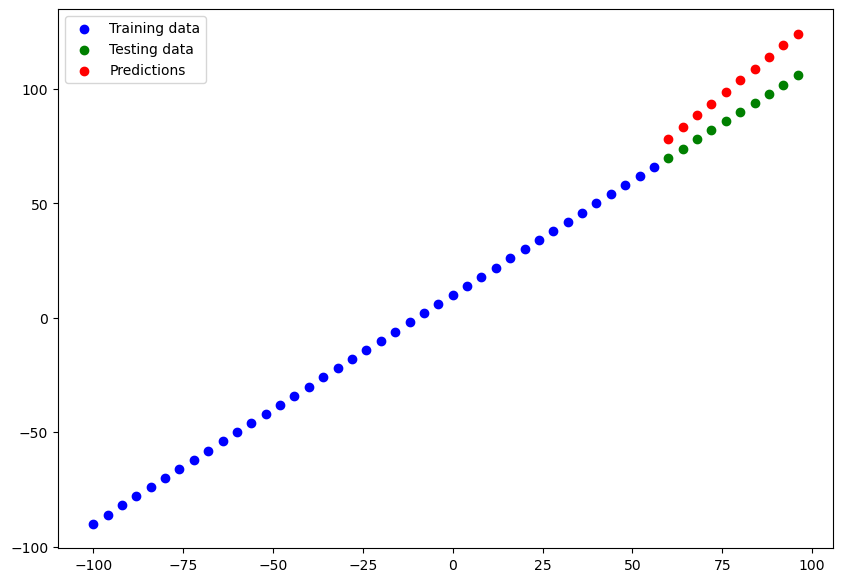

In [29]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [30]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 175ms/step - loss: 13.2127 - mae: 13.2127


[13.21270751953125, 13.21270751953125]

#### MAE

In [31]:
y_preds

array([[ 78.254326],
       [ 83.35619 ],
       [ 88.458046],
       [ 93.55991 ],
       [ 98.66178 ],
       [103.76363 ],
       [108.8655  ],
       [113.96737 ],
       [119.06923 ],
       [124.17109 ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_preds)))

<tf.Tensor: shape=(), dtype=float32, numpy=13.2127075>

#### MSE

In [34]:
tf.metrics.mean_squared_error(y_test, tf.squeeze(
    tf.constant(y_preds)
))

<tf.Tensor: shape=(), dtype=float32, numpy=184.592>

### Plot Model

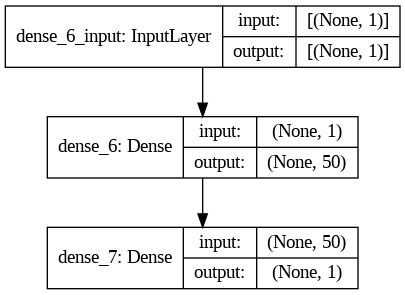

In [35]:
plot_model(model, show_shapes=True)

### Save Model

Two ways to save Model
- Save Model format
- HDF5 format (Heirarchial Data Format)

In [36]:
model.save('sample_regression_model')

2023-06-24 17:54:20.736907: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: sample_regression_model/assets


In [37]:
model.save('sample_regression_model.h5')

### Load Model

In [38]:
loaded_model = keras.models.load_model('./sample_regression_model.h5')

In [39]:
loaded_model.predict(X_test)

array([[ 78.254326],
       [ 83.35619 ],
       [ 88.458046],
       [ 93.55991 ],
       [ 98.66178 ],
       [103.76363 ],
       [108.8655  ],
       [113.96737 ],
       [119.06923 ],
       [124.17109 ]], dtype=float32)

## Insurance Dataset

### Load Dataset

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Describe

In [43]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Categorical data distribution

In [44]:
cat_cols = ['sex', 'smoker', 'region']

In [45]:
df.loc[:, cat_cols[0]].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [46]:
df.loc[:, cat_cols[1]].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [47]:

df.loc[:, cat_cols[2]].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [48]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### OHE

In [49]:
df_ohe = pd.get_dummies(df, columns=cat_cols)

In [50]:
df_ohe.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
X = df_ohe
y = X.pop('charges')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

### Base Model

In [54]:
tf.random.set_seed(42)

# Create a Base Model
base_model = keras.models.Sequential([
    keras.layers.Dense(10, activation=keras.activations.relu),
    keras.layers.Dense(1)
])

# Compile
base_model.compile(
    loss=keras.losses.mae, 
    optimizer=keras.optimizers.SGD(),
    metrics=['mae', 'mse']
)

# Fit
base_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8740.4277 - mae: 8740.4277 - mse: 191421984.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7858.0439 - mae: 7858.0439 - mse: 169363872.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7613.1973 - mae: 7613.1973 - mse: 163859200.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7803.1304 - mae: 7803.1304 - mse: 176867712.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7685.9766 - mae: 7685.9766 - mse: 163182576.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7598.8950 - mae: 7598.8950 - mse: 162762448.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7574.9692 - mae: 7574.9692 - mse: 163774080.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7692.7188 - mae: 7692.7188 - mse: 162155168.0000
Epoch 9/100
34/34 [=====

#### Evaluate

In [55]:
base_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8326.4160 - mae: 8326.4160 - mse: 110007464.0000


[8326.416015625, 8326.416015625, 110007464.0]

### Tuned Model - V1

In [56]:
tf.random.set_seed(42)

# Create a Base Model
ins_v1_model = keras.models.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

# Compile
ins_v1_model.compile(
    loss=keras.losses.mae, 
    optimizer=keras.optimizers.SGD(),
    metrics=['mae', 'mse']
)

# Fit
ins_v1_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 25600.5898 - mae: 25600.5898 - mse: 5357515264.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12259.8389 - mae: 12259.8389 - mse: 294413088.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11104.5205 - mae: 11104.5205 - mse: 264559216.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 9973.1260 - mae: 9973.1260 - mse: 232785408.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9088.5947 - mae: 9088.5947 - mse: 203709472.0000
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 8595.4502 - mae: 8595.4502 - mse: 183846016.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8383.2236 - mae: 8383.2236 - mse: 171325872.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 8314.6133 - mae: 8314.6133 - mse: 165058192.0000
Epoch 9/100
34/34

In [57]:
ins_v1_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8648.5244 - mae: 8648.5244 - mse: 166339872.0000


[8648.5244140625, 8648.5244140625, 166339872.0]

### Tuned Model - V2

In [58]:
tf.random.set_seed(42)

# Create a Base Model
ins_v2_model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

# Compile
ins_v2_model.compile(
    loss=keras.losses.mae, 
    optimizer=keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# Fit
history = ins_v2_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13265.5918 - mae: 13265.5918 - mse: 320142304.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12428.1279 - mae: 12428.1279 - mse: 297150848.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 9039.3174 - mae: 9039.3174 - mse: 206655312.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7473.6572 - mae: 7473.6572 - mse: 151780576.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7378.1323 - mae: 7378.1323 - mse: 151297632.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7315.8662 - mae: 7315.8662 - mse: 156163344.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7237.2495 - mae: 7237.2495 - mse: 153824960.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7163.6514 - mae: 7163.6514 - mse: 154381008.0000
Epoch 9/100
34/34 [=

In [59]:
ins_v2_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2590.0486 - mae: 2590.0486 - mse: 31114218.0000


[2590.048583984375, 2590.048583984375, 31114218.0]

#### Plot histroy

In [60]:
def plot_history(history, loss='loss'):
    model_hist = pd.DataFrame(history.history)
    # plt.plot(model_hist.index, model_hist.mae, label = 'MAE')
    plt.plot(model_hist.index, model_hist[loss], label = loss)
    # plt.plot(model_hist.index, model_hist.mse, label = 'MSE')
    plt.legend()

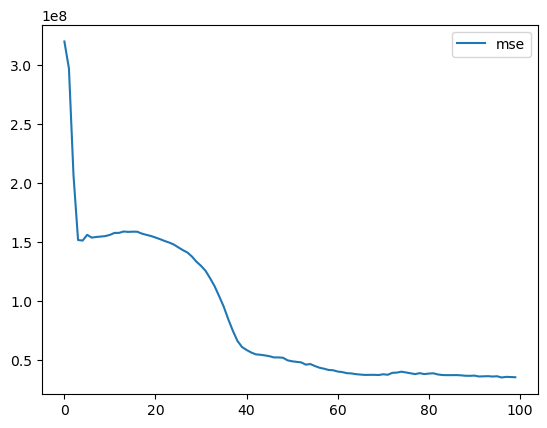

In [61]:
plot_history(history, 'mse')

### EDA - Contd.

In [62]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


#### Normalization & Standardization

<AxesSubplot:ylabel='Frequency'>

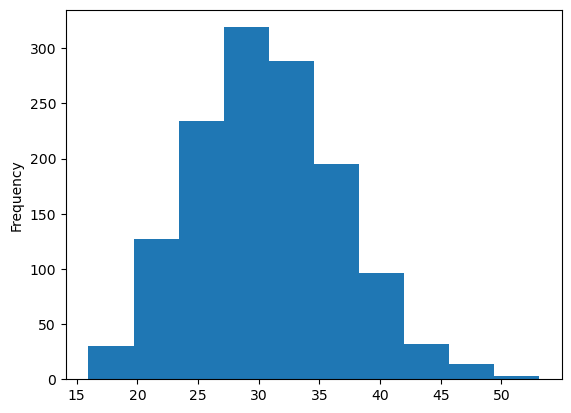

In [63]:
X.bmi.plot(kind='hist')

In [64]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [65]:
temp_df = df_ohe.copy(deep=True)

In [66]:
temp_df['charges'] = df.charges

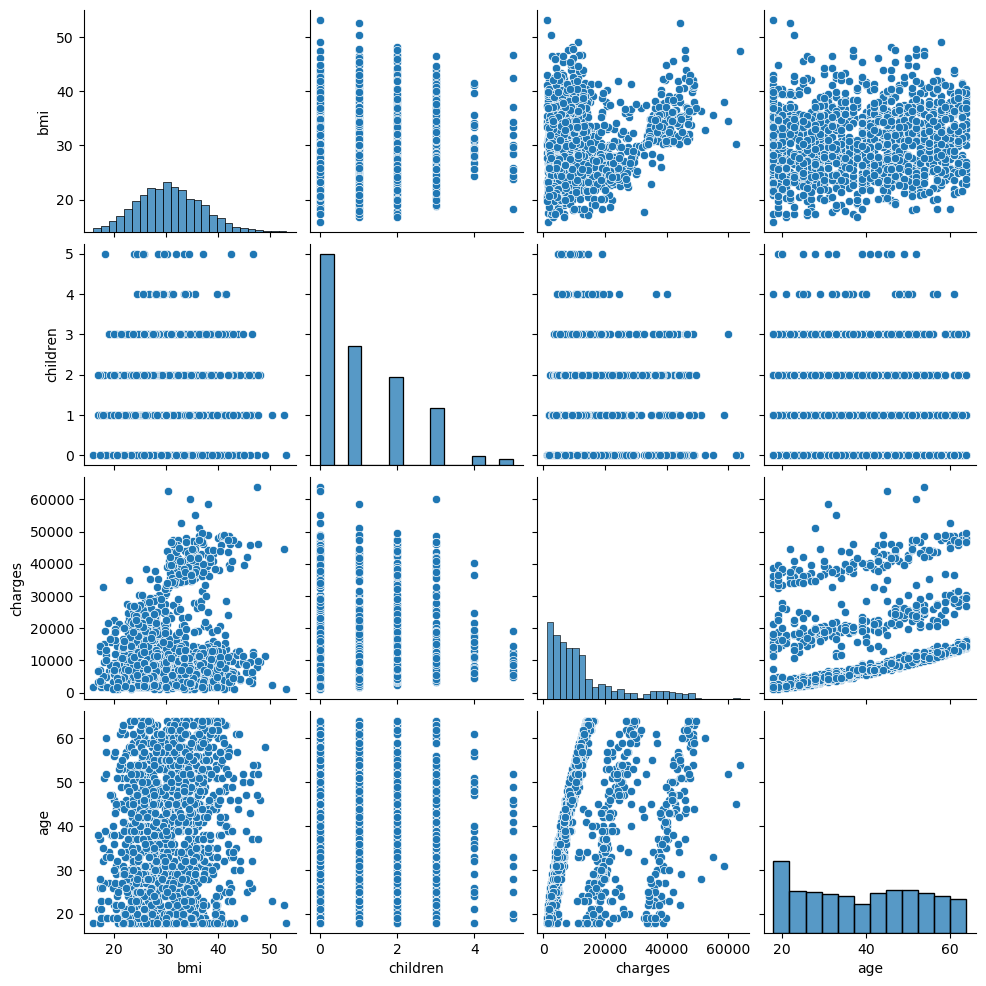

In [67]:
sns.pairplot(temp_df.loc[:, ['bmi', 'children', 'charges', 'age']])

##### Column Transformer

In [68]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region']),
    remainder='passthrough'
)

X = df.drop('charges', axis=1)
y = df.charges

In [69]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [70]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Column Transformer - Fit on training data only
ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [73]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [74]:
ct._iter

<bound method ColumnTransformer._iter of ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])>

In [75]:
X_train_norm

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [76]:
X_train.shape, X_train_norm.shape

((1070, 6), (1070, 11))

In [77]:
pd.DataFrame(X_train_norm)

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


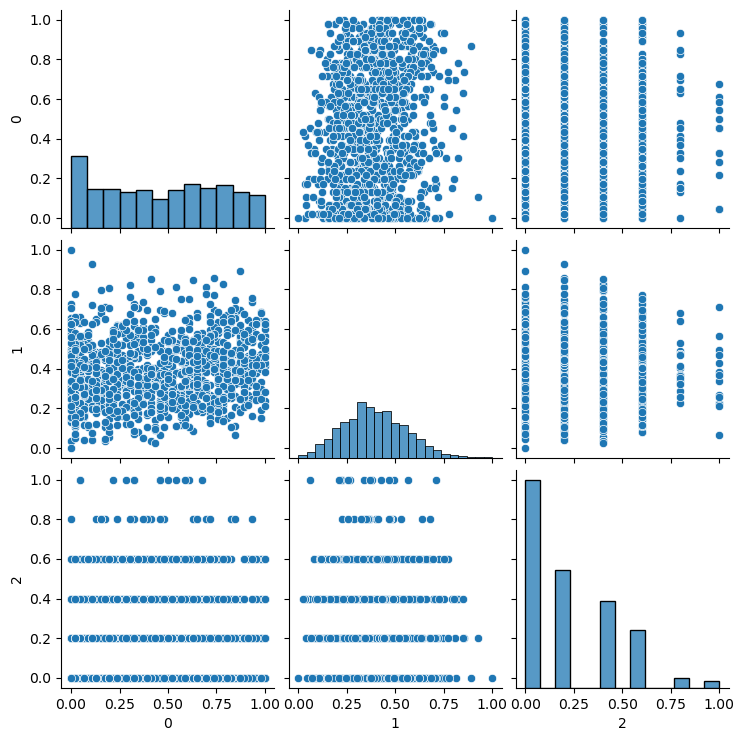

In [78]:
sns.pairplot(pd.DataFrame(X_train_norm).loc[:, [0, 1, 2]])

### Tuned Model - V3

In [79]:
tf.random.set_seed(42)

# Create a Base Model
ins_v3_model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

# Compile
ins_v3_model.compile(
    loss=keras.losses.mae, 
    optimizer=keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# Fit
history = ins_v3_model.fit(X_train_norm, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13341.3906 - mae: 13341.3906 - mse: 322325088.0000
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13268.7041 - mae: 13268.7041 - mse: 320340544.0000
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12767.3643 - mae: 12767.3643 - mse: 307087744.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 10989.2891 - mae: 10989.2891 - mse: 261920896.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 8599.2646 - mae: 8599.2646 - mse: 190000656.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7877.8027 - mae: 7877.8027 - mse: 154148640.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7680.3374 - mae: 7680.3374 - mse: 145352544.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7469.5596 - mae: 7469.5596 - mse: 137675088.0000
Epoch 9/100
34/3

In [80]:
ins_v3_model.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2697.0791 - mae: 2697.0791 - mse: 36853084.0000


[2697.0791015625, 2697.0791015625, 36853084.0]

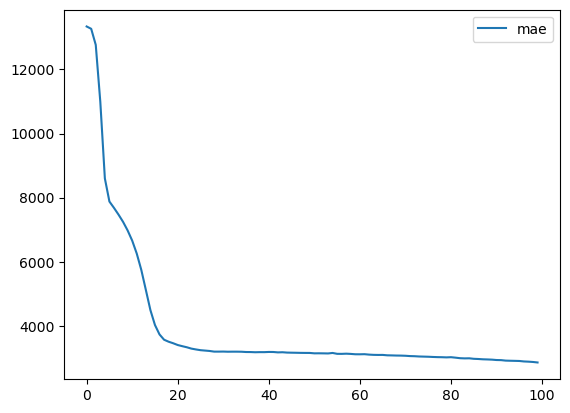

In [84]:
plot_history(history, 'mae')

### Tuned Model - V4

In [91]:
tf.random.set_seed(42)

# Create a Base Model
ins_v4_model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compile
ins_v4_model.compile(
    loss=keras.losses.mae, 
    optimizer=keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# Fit
history = ins_v4_model.fit(X_train_norm, y_train, epochs=500, verbose=0, workers=6)

In [92]:
ins_v4_model.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 1449.3000 - mae: 1449.3000 - mse: 19833212.0000


[1449.300048828125, 1449.300048828125, 19833212.0]

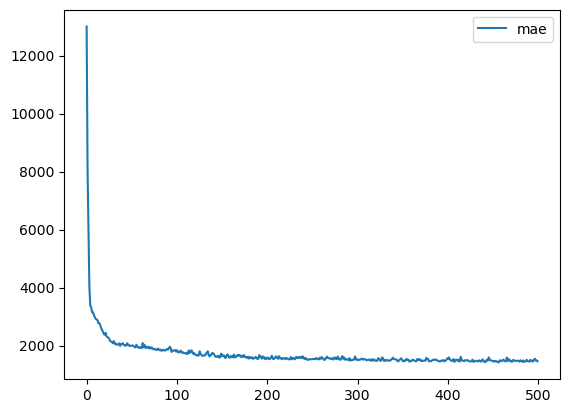

In [93]:
plot_history(history, 'mae')

### Linear Regression using Scikit Learn

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [95]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_norm, y_train)

LinearRegression()

In [96]:
linear_reg.coef_, linear_reg.intercept_

(array([ 1.18208825e+04,  1.25297302e+04,  2.12639392e+03,  9.29584582e+00,
        -9.29584582e+00, -1.18255644e+04,  1.18255644e+04,  4.59585244e+02,
         8.89079180e+01, -1.98279052e+02, -3.50214110e+02]),
 9431.024121553723)

In [97]:
y_preds = linear_reg.predict(X_test_norm)

In [98]:
mean_absolute_error(y_test, y_preds), mean_squared_error(y_test, y_preds)

(4181.194473753648, 33596915.851361476)